In [3]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from scipy.signal import freqz


import pomozne as lib
import filters as fil


Primerjava signalov z in brez šuma

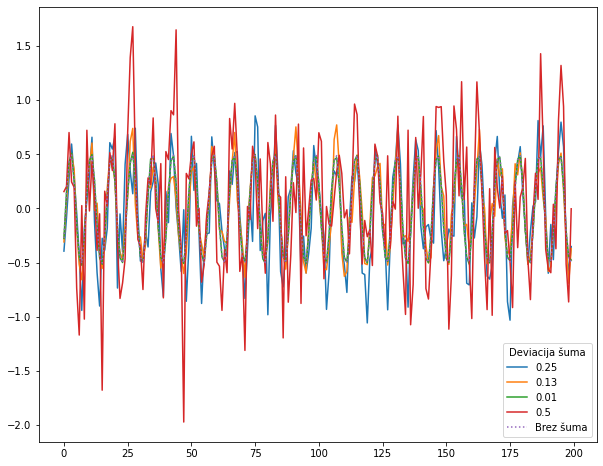

In [18]:
base_path = "./posnetki/poskus2/"
SAMPLE_RATE = 400

audio_ref_path = base_path + "001" + "_ref.wav"
audio, _ = librosa.load(audio_ref_path, sr=SAMPLE_RATE, mono=True)

audio = audio[0:200]
plt.figure(figsize=(10, 8))

for noise_sigma in [0.25, 0.13, 0.01, 0.5]:
    # generating noise
    mu, sigma = 0, noise_sigma
    noise = np.random.normal(mu, sigma, size=len(audio))
    test_signal = audio + noise
    plt.plot(test_signal, label=sigma)
    
plt.plot(audio, ":", label="Brez šuma")
plt.legend(title="Deviacija šuma")
plt.show()


Primerjava frekvenčne karakteristike bandpass filtra

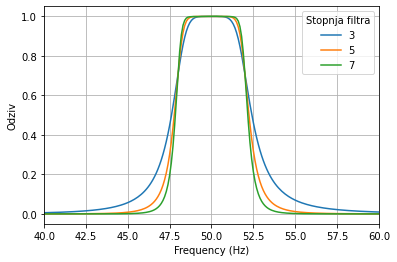

In [15]:
fs = 400
lowcut = 48
highcut = 52

for order in [3 ,5,7]:
        b, a = fil.butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="%d" % order)

plt.xlabel('Frequency (Hz)')
plt.xlim(40, 60)
plt.ylabel('Odziv')
plt.grid(True)
plt.legend(loc='best', title="Stopnja filtra")

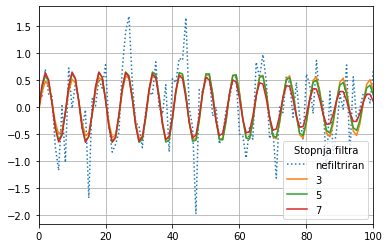

In [25]:
fs = 400
lowcut = 48
highcut = 52

plt.plot(test_signal, ":", label= "nefiltriran")

for order in [3 ,5,7]:
        filtered = fil.butter_bandpass_filter(test_signal, lowcut, highcut, fs, order=order)
        plt.plot(filtered, label= order)

plt.xlim(0, 100)
plt.grid(True)
plt.legend(loc='best', title="Stopnja filtra")